# 7.2 CNN 기반 인공신경망 학습하기

## 7.2.1 MNIST 데이터 셋

### ① 패키지, 데이터 준비

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import sys
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

In [2]:
# 데이터 불러오기
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
print("학습셋 shape:", X_train.shape)
print("학습셋: {0}개, 테스트셋: {1}개".format(X_train.shape[0], X_test.shape[0]))

11501568/11490434 [==============================] - 0s 0us/step
학습셋 shape: (60000, 28, 28)
학습셋: 60000개, 테스트셋: 10000개


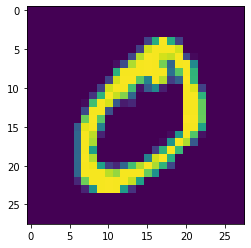

In [3]:
plt.imshow(X_train[1])
plt.show()

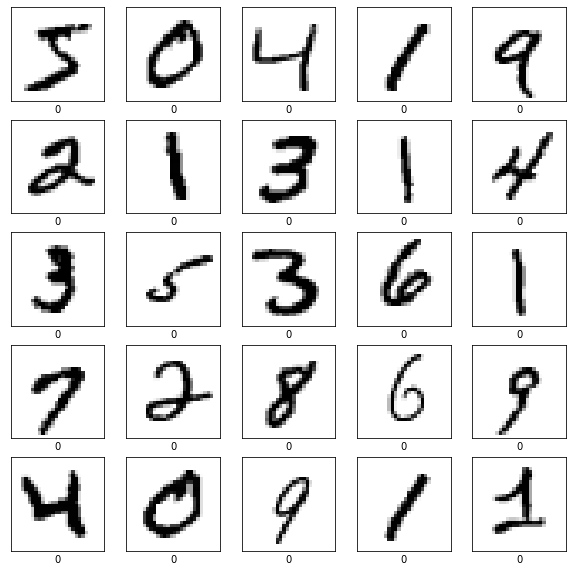

In [4]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(np.argmax(Y_train[i]))
plt.show()

In [5]:
X_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [6]:
for i in X_train[1]:
    for j in i:
        print(j, end="  ")
    print("\n")

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  51  159  253  159  50  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  0  48  238  252  252  252  237  0  0  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  0  0  54  227  253  252  239  233  252  57  6  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  10  60  224  252  253  252  202  84  252  253  122  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  0  163  252  252  252  253  252  252  96  189  253  167  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  0  51  238  253  253  190  114  253  228  47  79  255  168  0  0  0  0  0  0  

0  0  0  0  0  0  0  0  0  48  238  252  252  

In [7]:
X_train = X_train / 255
X_test = X_test / 255

In [8]:
for i in X_train[1]:
    for j in i:
        print(j, end="  ")
    print("\n")

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.2  0.6235294117647059  0.9921568627450981  0.6235294117647059  0.19607843137254902  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.18823529411764706  0.9333333333333333  0.9882352941176471  0.9882352941176471  0.9882352941176471  0.9294117647058824  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

In [9]:
X_train.shape

(60000, 28, 28)

In [10]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [11]:
X_train.shape

(60000, 28, 28, 1)

In [12]:
Y_train[0]

5

In [13]:
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)

In [14]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### ② CNN 구성

In [15]:
# 컨볼루션 신경망의 설정
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [16]:
# 모델 최적화 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath="./model/{epoch:02d}-{val_loss:.2f}.hdf5"
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

### ③ 학습

In [ ]:
# 모델의 실행
history = model.fit(X_train, Y_train, 
                    validation_data=(X_test, Y_test), 
                    epochs=30, batch_size=200, verbose=1,
                    callbacks=[early_stopping_callback,checkpointer])

# 테스트 정확도 출력
print("\n Test Accuracy: %.4f" % (model.evaluate(X_test, Y_test)[1]))

Epoch 1/30
300/300 [==============================] - ETA: 0s - loss: 0.2708 - accuracy: 0.9172
Epoch 1: val_loss improved from inf to 0.05813, saving model to ./model/01-0.06.hdf5
300/300 [==============================] - 160s 527ms/step - loss: 0.2708 - accuracy: 0.9172 - val_loss: 0.0581 - val_accuracy: 0.9818
Epoch 2/30
300/300 [==============================] - ETA: 0s - loss: 0.0894 - accuracy: 0.9731
Epoch 2: val_loss improved from 0.05813 to 0.03993, saving model to ./model/02-0.04.hdf5
300/300 [==============================] - 151s 502ms/step - loss: 0.0894 - accuracy: 0.9731 - val_loss: 0.0399 - val_accuracy: 0.9864
Epoch 3/30
300/300 [==============================] - ETA: 0s - loss: 0.0659 - accuracy: 0.9798
Epoch 3: val_loss improved from 0.03993 to 0.03548, saving model to ./model/03-0.04.hdf5
300/300 [==============================] - 149s 496ms/step - loss: 0.0659 - accuracy: 0.9798 - val_loss: 0.0355 - val_accuracy: 0.9885
Epoch 4/30
112/300 [==========>.............

In [ ]:
history.history

In [ ]:
import pandas as pd

accuracy =  history.history['accuracy']
loss =  history.history['loss']
val_accuracy =  history.history['val_accuracy']
val_loss =  history.history['val_loss']

df = pd.DataFrame({'epochs' : range(len(accuracy)), 'accuracy': accuracy, 'loss': loss, 'val_accuracy': val_accuracy, 'val_loss': val_loss})

In [ ]:
import seaborn as sns

sns.lineplot(x= df['epochs'], y = df['val_loss'])
sns.lineplot(x= df['epochs'], y = df['loss'])